#### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from random import sample 

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline


In [8]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# [Inserte nombre de proyecto]

- Jorge Andres Mogotocoro Fajardo - 2160075
- 
- 

In [0]:
#url example './drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/'
# ./drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/Proyectos/Resumen de las tasas de suicidio de 1985 a 2016/master.csv

### No olvidar poner en la variable path la direccion de drive donde se trabaja...
**NOTA:** Experimentando un poco he llegado a la conclusion que no es tan eficiente trabajar varios en un mismos documento por tanto sugiero lo siguiente:

- Las variables *path* dado que es dependiente de cada uno por favor usar celdas independiente con su propia direccion asi el proximo que llegue a editar puede volver a ejecutar su progreso anterior.
- No editar las celdas ya implementadas, en lo posible mejor agregar comentarios sobre dudas o errores cometidos.

In [0]:
#Jorge:
path = './drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/Proyectos/Resumen de las tasas de suicidio de 1985 a 2016/' 

In [0]:
#...
path = ''

In [0]:
#...
path = './drive/My Drive/' 

In [11]:
d = pd.read_csv(path+"export_dataframe.csv")
country_codes = pd.read_csv(path+"wikipedia-iso-country-codes.csv")
print d.shape

(4920, 12)


In [8]:
d.describe()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4.920000e+03,4920.000000,4920.000000,4920.00000,4920.000000,4920.000000
mean,384.434146,2000.685366,0.500000,2.500000,758.243293,5.923827e+06,15.854634,0.777841,1689.58028,15683.439024,2.356504
std,278.392709,8.514901,0.500051,1.707999,1353.821648,6.869358e+06,19.604547,0.084020,3063.97460,16082.475343,1.423005
min,32.000000,1985.000000,0.000000,0.000000,1.000000,4.000000e+04,0.060000,0.576000,5.97800,428.000000,0.000000
25%,124.000000,1994.000000,0.000000,1.000000,64.000000,1.474379e+06,2.720000,0.713000,63.06700,2453.000000,1.000000
50%,276.000000,2001.000000,0.500000,2.500000,234.000000,3.392979e+06,8.605000,0.771000,489.84100,8439.500000,2.000000
75%,616.000000,2008.000000,1.000000,4.000000,843.000000,7.538125e+06,20.820000,0.861000,1842.62800,26394.000000,4.000000
max,860.000000,2015.000000,1.000000,5.000000,11767.000000,4.380521e+07,125.220000,0.916000,18120.71400,60387.000000,5.000000


In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,1985,0,5,202,363000,55.65,Argentina1985,0.694,88.417,3264,0
1,32,1985,0,4,485,1997000,24.29,Argentina1985,0.694,88.417,3264,0
2,32,1985,0,3,414,3346300,12.37,Argentina1985,0.694,88.417,3264,1
3,32,1985,1,4,210,2304000,9.11,Argentina1985,0.694,88.417,3264,0
4,32,1985,0,2,177,2234200,7.92,Argentina1985,0.694,88.417,3264,2


In [0]:
#d.drop(d.index[d.country == 410].values, inplace=True)
#d.drop(d.index[d.country == 643].values, inplace=True)

## $X_1$. Graficas:

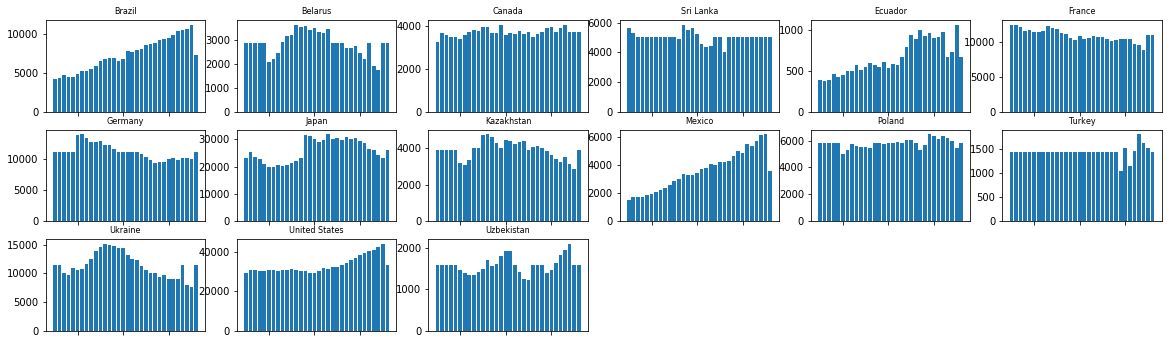

In [0]:
v=np.unique(d.country)
plt.figure(figsize=(20,40))
y=range(1985, 2017)
for i in range(1,len(v)):
  ant=d[d.country==v[i]]
  sn=[]
  for j in y:
    s=ant[ant.year==j].suicides_no.sum()
    sn=np.append(sn,s)
  sn[sn==0]=np.mean(sn[sn>0])
  plt.subplot(20,6,i).set_xticklabels([]),plt.bar(y,sn),plt.title( country_codes.English_short_name_lower_case[country_codes.Numeric_code == v[i]].values[0] , fontsize=8)

In [0]:
country_codes.English_short_name_lower_case[country_codes.Numeric_code == 10].values[0]

'Antarctica'

In [0]:
v=np.unique(d.country)
plt.figure(figsize=(20,40))
y=range(1985, 2017)
for i in range(1,len(v)):
  ant=d[d.country==v[i]]
  sn=[]
  for j in y:
    sn=np.append(sn,ant[ant.year==j].sum().suicides_no)
    
  #print v[i]
  #print sn
  #print y
  plt.subplot(20,6,i).set_xticklabels([]),plt.bar(y,sn),plt.title( country_codes.English_short_name_lower_case[country_codes.Numeric_code == v[i]].values[0] , fontsize=8)

## $X_2$: Analisis de dependencias de variables

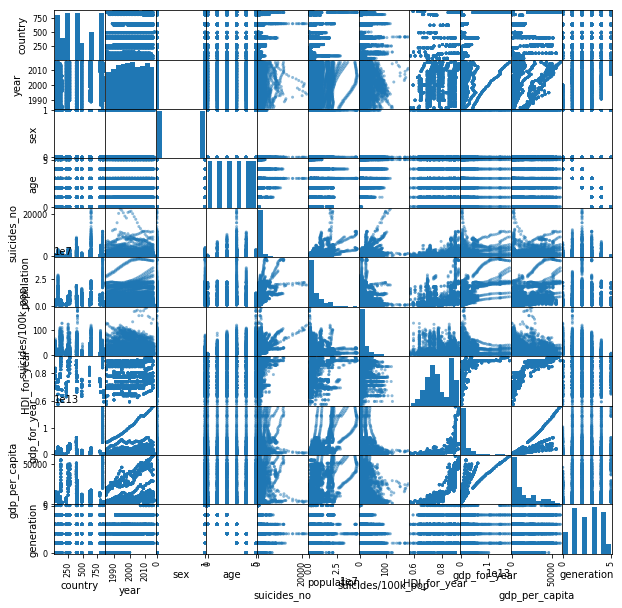

In [0]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

## $X_3$: Ensayo de modelos:

Modelos de regresion conocidos:

- **DecisionTreeRegressor** \\
 **MP:** \\
 **MAC:** \\
- **SVR** \\
 **MP:** \\
 **MAC:** \\
- **RandomForestRegressor** \\
 **MP:** \\
 **MAC:** \\
- **LinearRegression** \\
 **MP:** \\
 **MAC:** \\
- **Ridge** \\
 **MP:** \\
 **MAC:** \\
- **RidgeCV** \\
 **MP:** \\
 **MAC:** \\
- **Lasso** \\
 **MP:** \\
 **MAC:** \\
- **BayesianRidge** \\
 **MP:** \\
 **MAC:** \\
- **Logistic regression** \\
 **MP:** \\
 **MAC:** \\
- **PolynomialFeatures** \\
 **MP:** \\
 **MAC:** \\
 
**NOTA:**  **MP:** Mejores Parametros,  **MAC:**  Mejor Accuracy

In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,1985,0,5,202,363000,55.65,Argentina1985,0.694,88.417,3264,0
1,32,1985,0,4,485,1997000,24.29,Argentina1985,0.694,88.417,3264,0
2,32,1985,0,3,414,3346300,12.37,Argentina1985,0.694,88.417,3264,1
3,32,1985,1,4,210,2304000,9.11,Argentina1985,0.694,88.417,3264,0
4,32,1985,0,2,177,2234200,7.92,Argentina1985,0.694,88.417,3264,2


In [0]:
d.shape

(4920, 12)

In [0]:
X = d.values[:,[0,1,2,3,5,8,9,10,11]]
y = d.values[:,4]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

g = RandomForestRegressor()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 0.9978786454793529
acierto en test  0.9882474152369466


In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 3 4 5 6 7 8 9 10


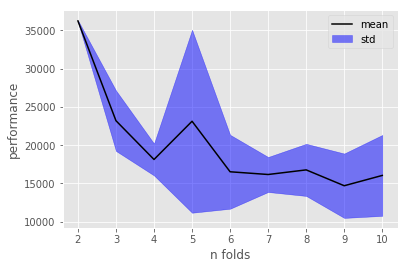

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

## $X_4$: Interpretacion y pruebas del modelo seleccionado:

In [0]:
X[100,]

array([32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0],
      dtype=object)

In [0]:
y[100]

58

In [0]:
prueba0 = np.array([[32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0]],
      dtype=object)
prueba0

array([[32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0]],
      dtype=object)

In [0]:
g.predict(prueba0)

array([54.1])

### Propuesto 1:  El año afecta minimamente al numero de suicidios



In [0]:
def year(sample, index):
  for i in np.unique(d.year):
    sample[0][1] = i
    eje.append(g.predict(sample))

  plt.xlabel('Year')
  plt.ylabel('Suicides No')
  titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
  plt.title(titulo)  
  plt.plot(np.unique(d.year),eje)

  return d[d.index == index]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
4672,860,1991,1,5,30,216200,13.88,Uzbekistan1991,0.65,13.678,788,0


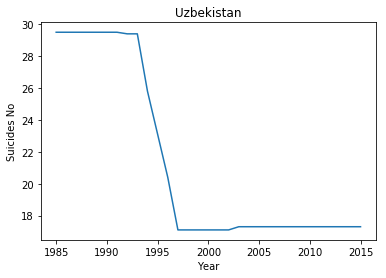

In [0]:
eje = []
import random
tamano = len(X)

ran = random.randrange(tamano)

sample = np.array([X[4672]],dtype=object)
year(sample = sample, index = 4672)

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
3953,804,1987,1,4,1024,6070300,16.87,Ukraine1987,0.713,64.088,1353,0


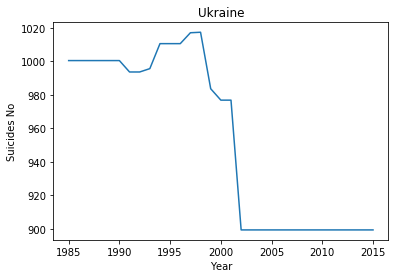

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.year):
  sample[0][1] = i
  eje.append(g.predict(sample))
 
plt.xlabel('Year')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.year),eje)

d[d.index == ran]

### Presupuesto 2: El sexo influye en gran medida.




[[804 2005 1 5 800543 0.713 86.14200000000001 1917 1]]
('Reales:', 561)
('Predichos:', array([9.1]))


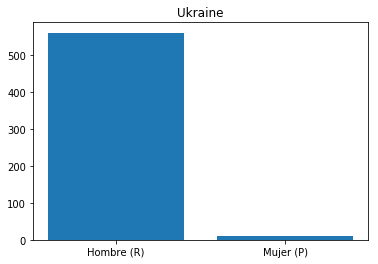

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
4164,804,2005,0,5,561,800543,70.08,Ukraine2005,0.713,86.142,1917,1


In [0]:
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)

if (d.sex[d.index == ran].values[0] == 0):
  sample[0][2] = 1
else:
  sample[0][2] = 0

predict = g.predict(sample)

if (sample[0][2] == 1):
  bars = ('Hombre (R)','Mujer (P)')
else:
  bars = ('Mujer (R)','Hombre (P)')
 
print(sample)
print("Reales:",d.suicides_no[d.index == ran].values[0])
print("Predichos:",predict)

y_pos = np.arange(len(bars))
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.bar(y_pos,[d.suicides_no[d.index == ran].values[0], predict])
plt.xticks(y_pos, bars)
plt.show()

d[d.index == ran]

### Presupuesto 3: La poblacion influye en gran medida con el numero de suicidios.

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
2736,392,2014,0,5,2254,6104000,36.93,Japan2014,0.891,4850.414,40328,1


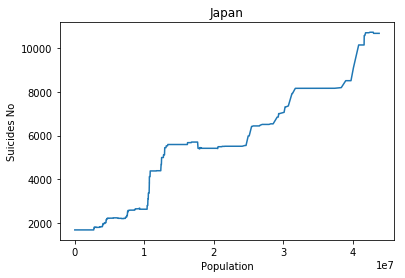

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.population):
  sample[0][4] = i
  eje.append(g.predict(sample))

 
plt.xlabel('Population')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.population),eje)

d[d.index == ran]

### Presupuesto 4: La edad de la persona

[[124 2007 0 0 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 1 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 2 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 3 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 4 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 5 1986129 0.8809999999999999 1464.977 46890 5]]


,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
1270,124,2007,0,0,18,1986129,0.91,Canada2007,0.881,1464.977,46890,5


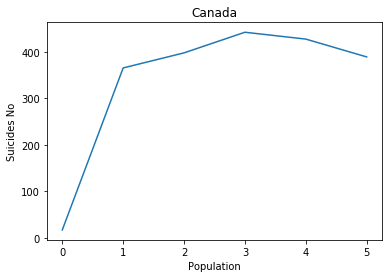

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.age):
  sample[0][3] = i
  print(sample)
  eje.append(g.predict(sample))

 
plt.xlabel('Population')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.age),eje)

d[d.index == ran]

In [0]:
max(d.population)

43805214

In [0]:
prueba1 = np.array([[32,1985,0,5,363000,0.694,88.417,3264,0]],
      dtype=object)
g.predict(prueba1)

In [0]:
d.head()

In [0]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

In [0]:
from sklearn.linear_model import Ridge
show_curve(Ridge())

In [0]:
from sklearn.ensemble import RandomForestRegressor
n = int(len(d[d.country == 32])*0.9)
est = RandomForestRegressor(n_estimators = 10)
perm = np.random.permutation(len(d[d.country == 32]))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print "MSE %.3f"% mean_squared_error(yts, est.predict(Xts))

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

### Presupuesto 5: Algoritmos no supervisados

Se pretende seleccionar **n** variables diferentes para ver de que maneras es posible agruparlas y a su vez tomar los grupos generados y ver el comportamiento de otras variables

#### <strike>1. Agrupar paises

Apartir del numero de suicidios de pretende tener lo siguiente: \\
X = [ suicidios_pais1, suicidios_pais2, ... , suicidios_pais16  ] \\
El objetivo es agrupar paises que posean comportamientos de suicidios similares y en consiguiente analizar los factores que los caracteriza<strike>

In [0]:
v=np.unique(d.country)
size = len(v)
min = np.inf
for i in v:
  pais = d.suicides_no[d.country == i].values  
  if pais.shape[0] < min:
    min = pais.shape[0]
print "El numero de registros de suicidios minimo de entre todos los paises es:", min

El numero de registros de suicidios minimo de entre todos los paises es: 84


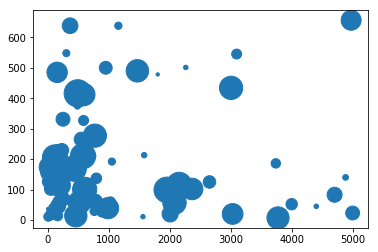

In [0]:
v=np.unique(d.country)
size = len(v)

p1 = np.random.randint(size)
p2 = np.random.randint(size)
p3 = np.random.randint(size)


p1 = d.suicides_no[d.country == v[p1]].values
p2 = d.suicides_no[d.country == v[p2]].values
p3 = d.suicides_no[d.country == v[p3]].values

pais1 = sample(p1, 84)
pais2 = sample(p2, 84)
pais3 = sample(p3, 84)

X = [ pais1 , pais2, pais3 ]
plt.scatter(X[0],X[1],X[2])

In [0]:
v=np.unique(d.country)
size = len(v)
X = []
for pais in v:
  p_values = d.suicides_no[d.country == pais].values
  p_muestra = sample(p1, 84)
  X.append(p_muestra)
X = np.array(X)
print "X:",X.shape
X_T = np.array(np.transpose(X))
print "X_T:",X_T.shape

X: (16, 84)
X_T: (84, 16)


In [0]:
#Nueva definicion de X, ahora va a tomar caracteristicas del dataset
X_T = d.values[:,[0,1,2,3,5,8,9,10,11]]
X = np.array(np.transpose(X_T))
print "X:",X.shape
print "X_T:",X_T.shape

X: (9, 4920)
X_T: (4920, 9)


In [0]:
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

kmeans = KMeans(n_clusters=9)  
kmeans.fit(X)  

indice = np.random.randint(16)
indice2 = np.random.randint(16)

Tamaño de X: (4920, 9)
Tamaño de Kmeans: (4920,)


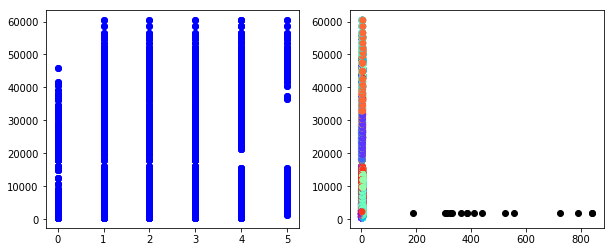

In [0]:
kmeans = KMeans(n_clusters=16)  
kmeans.fit(X_T)  

indice = np.random.randint(9)
indice2 = np.random.randint(9)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(X_T[:,indice], X_T[:,indice2], c="blue", cmap='rainbow');
print "Tamaño de X:",X_T.shape

plt.subplot(122)
plt.scatter(X[indice],X[indice2], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print "Tamaño de Kmeans:",kmeans.labels_.shape

Tamaño de X: (4920, 9)
Tamaño de DBS: (4920,)


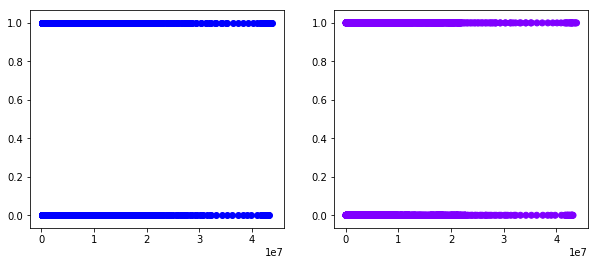

In [0]:
DBS = DBSCAN(eps=10)
DBS.fit(X_T) 

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(X_T[:,indice], X_T[:,indice2], c="blue", cmap='rainbow');
print "Tamaño de X:",X_T.shape

plt.subplot(122)
plt.scatter(X[indice],X[indice2], c=DBS.labels_, cmap='rainbow')  
print "Tamaño de DBS:",DBS.labels_.shape

#### 2. Agrupar paises

Apartir de una serie de caracteristicas se pretende agrupar el **conjunto de datos** y ver en que se caracteriza cada grupo agrupado

In [0]:
#sb.pairplot(d.dropna(), hue='generation',size=4,vars=["population","HDI_for_year","gdp_per_capita"],kind='scatter')

In [0]:
X = np.array(d[["population","HDI_for_year","gdp_per_capita"]])

In [0]:
X = np.array(d[["suicides_no","population","HDI_for_year"]])

In [0]:
X = np.array(d[["suicides_no","population","HDI_for_year","country", "sex", "gdp_for_year", "generation"]])

In [0]:
X = np.array(d[["sex","HDI_for_year"]])

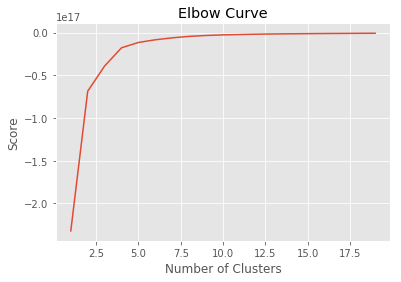

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.         0.8638908 ]
 [1.         0.7696    ]
 [0.         0.71439831]
 [1.         0.68528276]
 [1.         0.87363333]]


IndexError: ignored

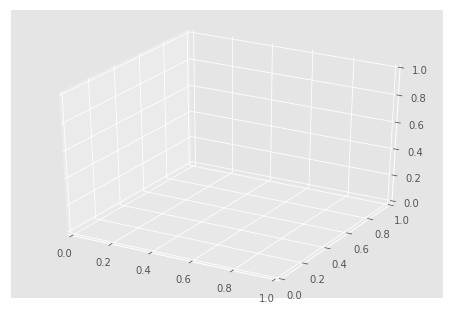

In [0]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [0]:
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,1044
1,green,690
2,blue,1416
3,cyan,870
4,yellow,900


In [0]:
set(d.country.values)

{32, 76, 112, 124, 144, 218, 250, 276, 392, 398, 484, 616, 792, 804, 840, 860}

In [0]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['country']=[32, 76, 112, 124, 144, 218, 250, 276, 392, 398, 484, 616, 792, 804, 840, 860]
diversidadGrupo['cantidad']=group_referrals.groupby('country').size()
diversidadGrupo

In [0]:
kmeans.labels_

array([2, 2, 2, ..., 2, 3, 3], dtype=int32)

In [0]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1116,  377, 3084,  497, 2632])

In [0]:
d[d.index == closest[0]]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
1116,124,1995,0,2,744,2489100,29.89,Canada1995,0.861,604.032,21871,3


In [0]:
d[d.index == closest[1]]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
377,112,1990,1,5,61,339400,17.97,Belarus1990,0.771,21.65,2301,0


In [0]:
d[d.index == closest[2]]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
3084,484,1986,0,5,70,442100,15.83,Mexico1986,0.713,129.441,1873,0


In [0]:
d[d.index == closest[3]]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
497,112,2000,1,5,67,331579,20.21,Belarus2000,0.683,12.737,1335,0


In [0]:
d[d.index == closest[4]]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
2632,392,2005,1,5,1600,7307828,21.89,Japan2005,0.874,4755.411,39412,1


In [0]:
paises=d['country'].values

country = []

for row in closest:
    print(paises[row])
    country.append(paises[row])

218
840
276
840
484


In [0]:
d[d.country == country[0]]

In [0]:
d[d.country == country[1]]

In [0]:
d[d.country == country[2]]

In [0]:
d[d.country == country[3]]

In [0]:
d[d.country == country[4]]

### Presupuesto 6: Poblacion simulada - GA/SA
A partir de una poblacion simulada y usando Algoritmos Geneticos o Simmulated Annealing es posible determinar los mejores valores de HDI y GDP con tal de minimizar <strike> o maximizar </strike> el numero de suicidios.

Cracteristicas: X = [ 0,1,2,3,5,8,9,10,11 ]        y = [ 4 ] 

X = [ country,	year,	sex,	age,	**population**,	**HDI_for_year**,	**gdp_for_year**,	**gdp_per_capita**,	generation ]


y = [ suicides_no ]

Ejemplo individuo: [ 32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0 ]

In [0]:
max(d.population.values)

43805214

In [0]:
set(d[d.age == 3].generation)

{1, 2, 3}

In [0]:
list(set(d.HDI_for_year.values))

In [0]:
min(d.gdp_per_capita.values)

428

In [0]:
x = range(0,10000)
for i in range(1,10000):
  if (0.134*np.log(i)-0.55 > 0):
    print "Minimo valor para que sea mayor que 0:", i
    break

Minimo valor para que sea mayor que 0: 61


In [0]:
0.134*np.log(50167)-0.55

0.900297104345887

#### Funcion Calculo HDI

HDI = HDI_for_year

GDP = gdp_per_capita

$ HDI = 0.134*log(GDP)-0.55  $

In [0]:
def calculo_HDI(gdp_per_capita):
  return 0.134*np.log(gdp_per_capita)-0.55 

#### Funcion Correspondiente GDP For Year

Con tal de no generar individuos incongruentes dado que existe una relacion directa entre **"gdp per capita"** y **"gdp for year"** se pretende asociar un valor de **"gdp per capita"** con el valor de **"gdp for year"** mas cercano existente en el data set.

In [0]:
def cor_gdp_for_year(gdp_per_capita):
  idx = (np.abs(d.gdp_per_capita.values-gdp_per_capita)).argmin()
  return d[d.index == idx].gdp_for_year.values[0]

#### Funcion de validacion de respuestas

¿Cuando una respuesta es valida?

Cuando los valores de **HDI for year, GDP for year y generation** son concordantes con lo siguiente:

- Para **HDI for year:**

  Para la solucion a evaluar el valor que trae para **HDI for year** debe ser igual al evaluar **GDP per capita** en la funcion **calculo_HDI( )**, osea debe ser igual el valor que trae al valor que calculado.
  
- Para **GDP for year:** 

  El valor de **GDP for year** debe ser igual al generado por la funcion **cor_gdp_for_year( )**.
- Para **generation**:

  El valor de **generation** debe hacer parte de los valores de **generation** presentes en el data set al filtarar por la **edad** presente en la solucion.

Colombia,**2014**,female,5-14 years,27,3934580,0.69,Colombia2014,0.72,**"378,195,716,714"**,8591,Generation Z

In [0]:
def KS_isvalid2(solution):
  
  age = solution[3]
  
  HDI_for_year = calculo_HDI(solution[7])
  gdp_for_year = cor_gdp_for_year(solution[7])
  generation = list(set(d[d.age == age].generation))
  print "\n"
  print "¿Correcto HDI_for_year?:",HDI_for_year,solution[5],HDI_for_year == solution[5] 
  print "¿Correcto gdp_for_year?:",gdp_for_year,solution[6],gdp_for_year == solution[6]
  print "¿Correcta generation?:", solution[8],generation,solution[8] in generation
  
  return HDI_for_year == solution[5] and gdp_for_year == solution[6] and solution[8] in generation


In [0]:
def KS_isvalid(solution):
  
  age = solution[3]
  HDI_for_year = calculo_HDI(solution[7])
  gdp_for_year = cor_gdp_for_year(solution[7])
  generation = list(set(d[d.age == age].generation))
  
  return HDI_for_year == solution[5] and gdp_for_year == solution[6] and solution[8] in generation

In [0]:
gdp_per_capita = np.random.randint(428,60387)
print "Random gdp_per_capita:",gdp_per_capita
HDI_for_year =calculo_HDI(gdp_per_capita) 
print "Calculo de HDI_for_year:", HDI_for_year

print "Correspondiente gdp_for_year:",cor_gdp_for_year(gdp_per_capita)

Random gdp_per_capita: 58623
Calculo de HDI_for_year: 0.9211702402637592
Correspondiente gdp_for_year: 17427.609


#### Funcion de Inializacion de poblacion

Para inicializar una funcion se debe tener en cuenta lo siguiente:

- country: Puede tomar cualquier valor de codigo de pais presente en el dataset.
- year: Cualquier valor de año presente en el dataset.
- sex: Cualquier valor de entre 0 o 1.
- age: Cualquier valor entero de entre 0 a 5
- population: Cualquier valor entero perteneciente al rango [40000  - 50000000] donde el 40000 hace referencia a la menor poblacion presente en el dataset y de igualmanera el tope del intervalo.
- **gdp_for_year:**   Cualquier valor entero en el rango [ 40000 - 500000000 ] los cuales hacen referencia al menor y mayor valor de **gdp_for_year** presentes en el dataset.
-  **HDI_for_year:** Se calcula con la funcion **calculo_HDI**
- **gdp_per_capita:** Se calcula con la funcion **cor_gdp_for_year**
- **generation:** Un valor aleatorio entre las genereciones presentes en el dataset al filtar por el valor de **year** anterior.

In [0]:
def TSP_initialize_population(n_individuals):
    r = []
    for i in xrange(n_individuals):
      
        country = np.random.choice(list(set(d.country.values)))
        year = np.random.choice(list(set(d.year.values)))
        sex = np.random.choice(list(set(d.sex.values)))
        age = np.random.choice(list(set(d.age.values)))
        population = np.random.randint(40000,50000000)
        
        gdp_per_capita = np.random.randint(428,60387)
        HDI_for_year =calculo_HDI(gdp_per_capita)
        gdp_for_year = cor_gdp_for_year(gdp_per_capita)
        
        generation = np.random.choice(list(set(d[d.age == age].generation)))
        
        r.append([country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation])
        
    return np.array(r)

In [0]:
pop = TSP_initialize_population(100)
for i in range(100):
  if ( KS_isvalid(pop[i]) == False ):
    print pop[i]

In [0]:
g.predict(pop)

array([5474. ,  155.2])

#### Funcion de crosso_ver

Padre:

[ **country, year, sex, age, population**, HDI_for_year, gdp_for_year, **gdp_per_capita, generation** ]

Madre:

[ country, year, sex, age, population, **HDI_for_year, gdp_for_year**, gdp_per_capita, generation ]

Hijo:

[ **country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation** ]

Para el ejemplo anterior los valores en **negrilla** son los que pasan al hijo no obstante se debe tener presente que el hijo generado sea valido de acuerdo a lo definido para la funcion **KS_isvalid( )**.

In [0]:
def TSP_cross_over(solution1, solution2):
  
    l = len(solution1)
    r = np.ones(l)
    
    while ( KS_isvalid(r) == False ):
      
      cstart = np.random.randint(l)
      cend   = np.random.randint(l-cstart)+cstart+1
      
      r = np.zeros(l)
      s1part = np.zeros(l)
      
      s1part = solution1[cstart:cend]
      r[cstart:cend] = s1part
      for i in range(l):
        if not i in range(cstart,cend):
          r[i]=solution2[i]
      if ( KS_isvalid(r) == True ):
        return r
    return r

In [0]:
l = len(pop[0])
r = np.ones(l)
KS_isvalid(r)

False

In [0]:
print "Padre:\n", pop[0]
print "Madre:\n", pop[1]
hijo = TSP_cross_over(pop[0],pop[1])
print "Hijo:\n", hijo

print "Parentesco Padre:\n", pop[0] == hijo
print "Parentesco Madre:\n", pop[1] == hijo
print "¿Es valido el hijo?:\n", KS_isvalid2(hijo)

Padre:
[7.60000000e+01 1.98700000e+03 1.00000000e+00 0.00000000e+00
 3.06587280e+07 8.65410867e-01 2.19612600e+03 3.86680000e+04
 3.00000000e+00]
Madre:
[2.50000000e+02 1.99700000e+03 1.00000000e+00 3.00000000e+00
 1.72890000e+05 8.95259418e-01 2.86140800e+03 4.83160000e+04
 3.00000000e+00]
Hijo:
[2.50000000e+02 1.99700000e+03 1.00000000e+00 3.00000000e+00
 1.72890000e+05 8.95259418e-01 2.86140800e+03 4.83160000e+04
 3.00000000e+00]
Parentesco Padre:
[False False  True False False False False False  True]
Parentesco Madre:
[ True  True  True  True  True  True  True  True  True]
¿Es valido el hijo?:
¿Correcto HDI_for_year?: 0.8952594183951728 0.8952594183951728 True
¿Correcto gdp_for_year?: 2861.408 2861.408 True
¿Correcta generation?: 3.0 [1, 2, 3] True
True


In [0]:
for i in range(100):
  if (i == 99):
    break
  hijo = TSP_cross_over(pop[i], pop[i+1])
  
  if ( KS_isvalid(hijo) == False ):
    print "No valido"

#### Funcion de Mutacion

Para este caso el gen de mutacion correspondera unicamente a un incremento o decremento en la caracteristica de **gdp_per_capita** dependiendo de la siguiente probabilidad.

- **mutation_prob:** Corresponde a la probabilidad de que se genere la mutacion.
- **variacion:** Hace referencia a un porcentaje definido como un valor entre 0 y 1 en el cual va aumentar o disminur **gdp_per_capita** este cambio se decide aleatoriamente por la variable **mutarion_prob**, si mayor a 0.5 se genera una mutacion de aumento, para lo contrario se genera una mutacion de decremento.

In [0]:
def TSP_mutate(solution, mutation_prob, variacion):
  # country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation
  mutated_solution = np.copy(solution)
  
  if np.random.random()<mutation_prob: 
    
    if np.random.random() > 0.5: #Aumentar
      gdp_per_capita = mutated_solution[7] * (1 + variacion)
    else: #Disminuir  
      gdp_per_capita = mutated_solution[7] * (1 - variacion)
      if gdp_per_capita < 60:
        gdp_per_capita = 60
        
    mutated_solution[7] = gdp_per_capita
    mutated_solution[5] = calculo_HDI(gdp_per_capita)
    mutated_solution[6] = cor_gdp_for_year(gdp_per_capita)
               
  return mutated_solution

In [0]:
individuo = np.array([[76.0,
                       1987.0,
                       1.0,
                       0.0,
                       30658728.0,
                       0.8654108669203227,
                       2196.126,
                       61, #gdp_per_capita
                       3.0]
                     ],dtype=object)
mutacion = np.array([TSP_mutate(individuo[0],1,0.5)],dtype=object)

print "Original:\n", individuo[0]
print "No Suidicios:", g.predict(individuo) 
print "Es valida:", KS_isvalid(individuo[0])
print "Mutacion:\n", mutacion[0]
print "No Suicidios:", g.predict(mutacion)
print "Es valida:", KS_isvalid(mutacion[0])

Original:
[76.0 1987.0 1.0 0.0 30658728.0 0.8654108669203227 2196.126 61 3.0]
No Suidicios: [1393.3]
Es valida: False
Mutacion:
[76.0 1987.0 1.0 0.0 30658728.0 0.05518942228571777 9.687999999999999 91.5
 3.0]
No Suicidios: [366.5]
Es valida: True


**Original:**

[276.0, 1998.0, 1.0, 2.0, 43355178.0, **0.840699481218012, 2503.665, 32156**,.0 3.0]

**No Suidicios: 1238.8**

**Mutacion (Disminuye):**

[276.0, 1998.0, 1.0, 2.0, 43355178.0, **0.7478177590229793, 377.43800000000005
, 16078.0**, 3.0]
 
**No Suicidios: 760.7**

**Mutacion (Aumenta):**

[276.0, 1998.0, 1.0, 2.0, 43355178.0, **0.8950318057045061, 2861.408, 48234.0**, 3.0]

**No Suicidios: 1222.9**

#### Funcion de Costo

Se define como la prediccion de la cantidad de suicidios que se podrian generar para cada solucion, por lo tanto se hace uso del predictor que mejores resultados dio en la seccion **$ X_3$ Ensayo de modelos**.

In [0]:
def TSP_cost(solution):
  solution = np.array([solution],dtype=object)
  return g.predict(solution)[0]

In [0]:
TSP_cost(pop[0])

1777.1

#### ga.py

Rutina que ensambla las partes del algoritmo genetico.

In [0]:
def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    plot_evolution(bests, means, stds)

In [0]:
%%writefile ga.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()
    

def run_ga(pop_size, init_population_function, 
           mutation_function, crossover_function, cost_function, 
           crossover_prob, mutation_prob,variacion, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)
    
    
    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):

        #if i%(n_iters/10)==0:
        # print i
        
        # do cross over
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        #print "permut_temp: ", permut_temp
        #print "idx_xover_indivs: ", idx_xover_indivs
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs = crossover_function(i1,i2)
            offsprings.append(offs)
        offsprings = np.array(offsprings)

        pop = np.vstack((pop, offsprings))

        # mutate population
        for j in xrange(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob, variacion)

        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]

        costs = costs[top_idxs]

        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))
        
        if best is None or np.min(costs) < cost_function(best):
          best = pop[np.argmin(costs)]

    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs)
    
    
    return best, best_costs, means, stds


Writing ga.py


<Figure size 432x288 with 0 Axes>

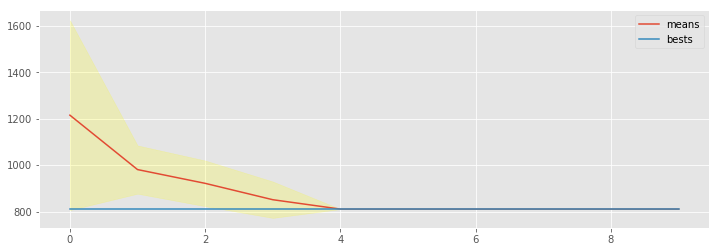

In [0]:
%run ga.py

r =  run_ga(pop_size=100, 
               init_population_function = TSP_initialize_population,
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = TSP_cost, 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               variacion                = 0.01, 
               n_iters                  = 10)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

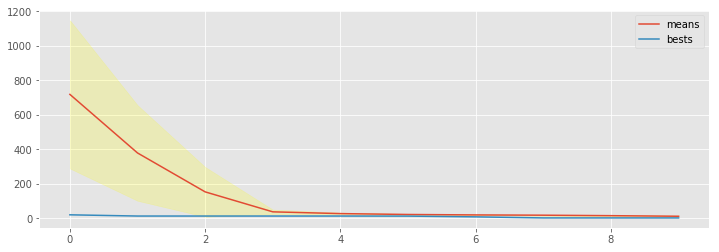

In [0]:
%run ga.py

r =  run_ga(pop_size=100, 
               init_population_function = TSP_initialize_population,
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = TSP_cost, 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               variacion                = 0.01, 
               n_iters                  = 10)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

In [0]:
print "[ country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation ]"
print "Mejor solucion: \n",best
print "Es valida: ☑", KS_isvalid(best), "☑"
print "No Suicidios:",TSP_cost(best)

print "Best cost:\n",best_costs
print "Medias:\n",means
print "Std:\n",stds

[ country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation ]
Mejor solucion: 
[2.18000000e+02 1.99500000e+03 1.00000000e+00 0.00000000e+00
 9.36570000e+04 8.07738194e-01 7.36380000e+02 2.51440000e+04
 4.00000000e+00]
Es valida: ☑ True ☑
No Suicidios: 2.4
Best cost:
[20.4 13.3 13.3 13.3 13.3 12.9  8.5  2.4  2.4  2.4]
Medias:
[719.146 379.26  153.492  37.655  27.411  22.343  19.801  18.154  15.436
  12.027]
Std:
[430.11893644 277.39991528 144.41723767  13.13380657   6.10833684
   3.54020494   2.44902001   2.99444219   4.5737407    4.22018613]


#### Análisis solucion obtenida

In [0]:
label = [ "country", "year", "sex", "age", "population", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation" ]
for i in range(9):
  print label[i],":", best[i]
print "no suicidios :", TSP_cost(best)

country : 218.0
year : 1995.0
sex : 1.0
age : 0.0
population : 93657.0
HDI_for_year : 0.807738193515972
gdp_for_year : 736.38
gdp_per_capita : 25144.0
generation : 4.0
no suicidios : 2.4


In [0]:
D = d[d.country == 218]
D = D[D.year == 1995]
D = D[D.generation == 4]
D[D.sex == 1]


,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
1474,218,1995,1,0,10,1325533,0.75,Ecuador1995,0.665,24.433,2453,4


**Variando parametros de la solucion encontrada.**

In [0]:
np.unique(d["country"])

array([ 32,  76, 112, 124, 144, 218, 250, 276, 392, 398, 484, 616, 792,
       804, 840, 860])

In [0]:
def variar(caracteristica, individuo):
  
  no_suicidios = []
  indice = [ "country", "year", "sex", "age", "population", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation" ]
  indice = indice.index(caracteristica)
  individuo = np.array([individuo],dtype=object)
  carac_original = individuo[0][indice]
  
  for i in np.unique(d[caracteristica]):
    
    individuo[0][indice] = i
    no_suicidios.append(g.predict(individuo))
    
    if carac_original == i:
      plt.scatter(i,g.predict(individuo),marker="*",color='blue', s=220)
    
  plt.xlabel(caracteristica)
  plt.ylabel("Numero Suicidios")
  plt.xticks(np.unique(d[caracteristica]))  
  plt.title("Variando: "+caracteristica)  
  plt.axvline(x=carac_original, color='blue')
  plt.scatter(np.unique(d[caracteristica]),no_suicidios)


In [0]:
individuo = [2.18000000e+02, 1.99500000e+03, 1.00000000e+00, 0.00000000e+00,
 9.36570000e+04, 8.07738194e-01, 7.36380000e+02, 2.51440000e+04,
 4.00000000e+00]

32: Argentina
218: Ecuador


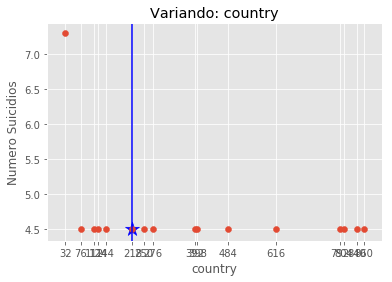

In [0]:
variar("country", individuo)
print "32: Argentina"
print str(int(individuo[0]))+":", "Ecuador"

Año minimo: 1985
Año maximo: 2015
Año individuo: 1995


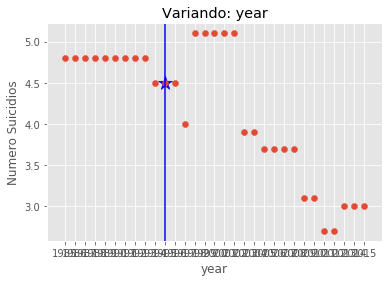

In [0]:
variar("year", individuo)
print "Año minimo:", min(d["year"])
print "Año maximo:", max(d["year"])
print "Año individuo:", int(individuo[1])

0: Hombre
1: Mujer


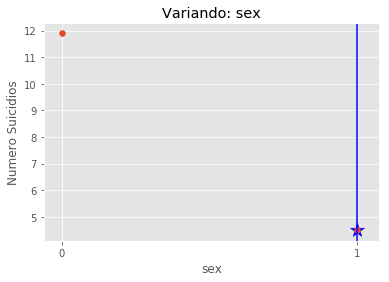

In [0]:
variar("sex", individuo)
print "0: Hombre"
print "1: Mujer"

0: 5-14 years
1: 15-24 years
2: 25-34 years
3: 35-54 years
4: 55-74 years
5: '75+ years


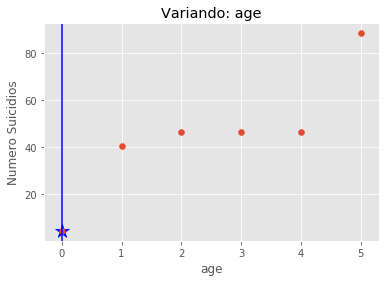

In [0]:
variar("age", individuo)
print "0: 5-14 years"
print "1: 15-24 years"
print "2: 25-34 years"
print "3: 35-54 years"
print "4: 55-74 years"
print "5: '75+ years"

Pop minima: 40000
Pop maxima: 43805214
Pop individuo: 93657


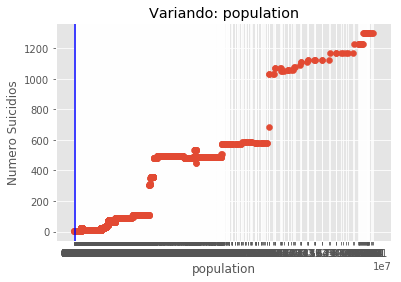

In [0]:
variar("population", individuo)
print "Pop minima:", min(d["population"])
print "Pop maxima:", max(d["population"])
print "Pop individuo:", int(individuo[4])

0: G.I. Generation
1: Silent
2: Boomers
3: Generation X
4: Millenials
5: Generation Z


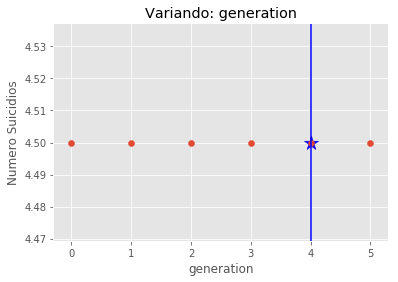

In [0]:
variar("generation", individuo)
print "0: G.I. Generation"
print "1: Silent"
print "2: Boomers"
print "3: Generation X"
print "4: Millenials"
print "5: Generation Z"

## **$ X_5: $** Aplicaciones

Finalmente con un modelo de regresion y un algoritmo genetico capaz de minimizar la cantidad de suicidios se proponen las siguientes aplicaciones.

### Aplicacion 1: Mejores condiciones de vida para Colombia 

Hallar los mejores valores de condicion humana para minimizar el numero de suicidios en un pais como Colombia.

In [0]:
calculo_HDI(6625.064)

0.6290144516988061

In [0]:
cor_gdp_for_year(6625.064)

60.763000000000005

**Ejemplo de poblaciones**

[ **170**, **2018**, sex, age, **49436892**, **0.6290144516988061**, **60.763000000000005**, **6625.064** , generation ]

- **country:** Colombia (**170**)
- **gdp_per_capita**: 6625.064 
- **HDI_for_year:** 0.6290144516988061
- **gdp_for_year:** 60.763000000000005

"Población de Colombia es de 48,2 millones de habitantes"

Fuente: https://id.presidencia.gov.co/Paginas/prensa/2019/190704-Poblacion-de-Colombia-es-de-48-2-millones-habitantes-segun-DANE.aspx

"Colombia GDP per Capita (**2018**)"

Fuente: https://countrymeters.info/es/Colombia


#### Redefinicion funcion de poblacion:

In [0]:
#170,2015,1,1,4070390,0.6275284338214093,291.519591533,6552,4
def TSP_initialize_population_CO(n_individuals):
    r = []
    for i in xrange(n_individuals):
      
        country = 170
        year = 2015
        sex = 1
        age = 1
        population = 4070390
        
        gdp_per_capita = np.random.randint(428,100000)
        HDI_for_year =calculo_HDI(gdp_per_capita)
        gdp_for_year = cor_gdp_for_year(gdp_per_capita)
        
        generation = np.random.choice(list(set(d[d.age == age].generation)))
        
        r.append([country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation])
        
    return np.array(r)

In [0]:
pop = TSP_initialize_population_CO(10)
pop

array([[3.20000000e+01, 2.01500000e+03, 0.00000000e+00, 1.00000000e+00,
        3.50058000e+06, 9.11636385e-01, 1.78864800e+03, 5.45970000e+04,
        3.00000000e+00],
       [3.20000000e+01, 2.01500000e+03, 0.00000000e+00, 1.00000000e+00,
        3.50058000e+06, 8.84925559e-01, 2.64261000e+03, 4.47300000e+04,
        3.00000000e+00],
       [3.20000000e+01, 2.01500000e+03, 0.00000000e+00, 1.00000000e+00,
        3.50058000e+06, 8.95848856e-01, 3.75251400e+03, 4.85290000e+04,
        3.00000000e+00],
       [3.20000000e+01, 2.01500000e+03, 0.00000000e+00, 1.00000000e+00,
        3.50058000e+06, 7.17484524e-01, 1.92627000e+02, 1.28210000e+04,
        3.00000000e+00],
       [3.20000000e+01, 2.01500000e+03, 0.00000000e+00, 1.00000000e+00,
        3.50058000e+06, 6.89737204e-01, 1.05269600e+03, 1.04230000e+04,
        4.00000000e+00],
       [3.20000000e+01, 2.01500000e+03, 0.00000000e+00, 1.00000000e+00,
        3.50058000e+06, 8.60469304e-01, 2.11574200e+03, 3.72680000e+04,
        3.0

In [0]:
pop = TSP_initialize_population_CO(100)
for i in range(100):
  if ( KS_isvalid(pop[i]) == False ):
    print "Solucion invalida:\n", pop[i]

#### ga.py

<Figure size 432x288 with 0 Axes>

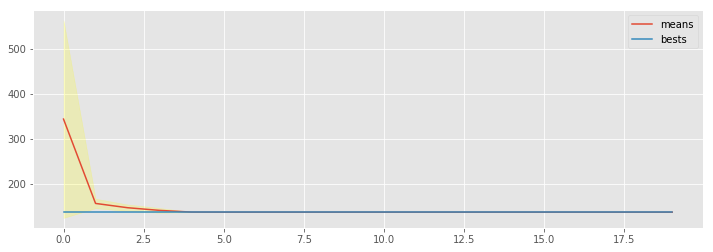

In [0]:
%run ga.py

r =  run_ga(pop_size=100, 
               init_population_function = TSP_initialize_population_CO,
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = TSP_cost, 
               crossover_prob           = 0.01,
               mutation_prob            = 0.01, 
               variacion                = 0.01, 
               n_iters                  = 20)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

In [0]:

print "[ country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation ]"
print "Mejor solucion: \n",best
print "Es valida: ☑", KS_isvalid(best), "☑"
print "No Suicidios:",TSP_cost(best)

print "Best cost:\n",best_costs
print "Medias:\n",means
print "Std:\n",stds

[ country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation ]
Mejor solucion: 
[1.70000000e+02 2.01500000e+03 1.00000000e+00 1.00000000e+00
 4.07039000e+06 8.96866638e-01 1.54913100e+03 4.88990000e+04
 4.00000000e+00]
Es valida: ☑ True ☑
No Suicidios: 137.5
Best cost:
[137.5 137.5 137.5 137.5 137.5 137.5 137.5 137.5 137.5 137.5 137.5 137.5
 137.5 137.5 137.5 137.5 137.5 137.5 137.5 137.5]
Medias:
[343.833 156.887 147.378 141.469 137.672 137.5   137.5   137.5   137.5
 137.5   137.5   137.5   137.5   137.5   137.5   137.5   137.5   137.5
 137.5   137.5  ]
Std:
[2.19054080e+02 1.05586141e+01 7.15159535e+00 5.27106621e+00
 1.98030301e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [0]:
label = [ "country", "year", "sex", "age", "population", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation" ]
for i in range(9):
  print label[i],":", best[i]
print "no suicidios :", TSP_cost(best)
print "Es valida: ☑", KS_isvalid(best), "☑"

country : 170.0
year : 2015.0
sex : 1.0
age : 1.0
population : 4070390.0
HDI_for_year : 0.8968666381977188
gdp_for_year : 1549.131
gdp_per_capita : 48899.0
generation : 4.0
no suicidios : 137.5
Es valida: ☑ True ☑


<Figure size 432x288 with 0 Axes>

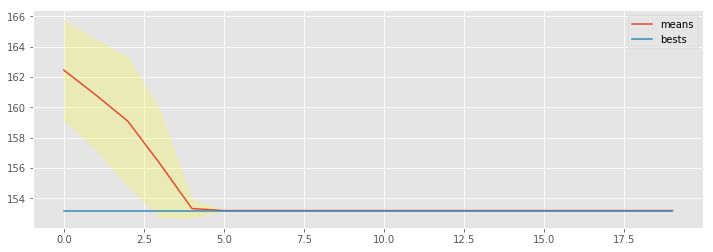

In [0]:
%run ga.py

r =  run_ga(pop_size=100, 
               init_population_function = TSP_initialize_population_CO,
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = TSP_cost, 
               crossover_prob           = 0.01,
               mutation_prob            = 0.1, 
               variacion                = 0.1, 
               n_iters                  = 20)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

In [0]:

print "[ country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation ]"
print "Mejor solucion: \n",best
print "Es valida: ☑", KS_isvalid(best), "☑"
print "No Suicidios:",TSP_cost(best)

print "Best cost:\n",best_costs
print "Medias:\n",means
print "Std:\n",stds

[ country, year, sex, age, population, HDI_for_year, gdp_for_year, gdp_per_capita, generation ]
Mejor solucion: 
[1.70000000e+02 2.01500000e+03 1.00000000e+00 1.00000000e+00
 4.07039000e+06 6.30020681e-01 5.27813000e+02 6.67500000e+03
 4.00000000e+00]
Es valida: ☑ True ☑
No Suicidios: 153.2
Best cost:
[153.2 153.2 153.2 153.2 153.2 153.2 153.2 153.2 153.2 153.2 153.2 153.2
 153.2 153.2 153.2 153.2 153.2 153.2 153.2 153.2]
Medias:
[162.459 160.824 159.091 156.294 153.334 153.2   153.2   153.2   153.2
 153.2   153.2   153.2   153.2   153.2   153.2   153.2   153.2   153.2
 153.2   153.2  ]
Std:
[3.28673379e+00 3.63103622e+00 4.24250150e+00 3.52152865e+00
 6.17125595e-01 5.68434189e-14 5.68434189e-14 5.68434189e-14
 5.68434189e-14 5.68434189e-14 5.68434189e-14 5.68434189e-14
 5.68434189e-14 5.68434189e-14 5.68434189e-14 5.68434189e-14
 5.68434189e-14 5.68434189e-14 5.68434189e-14 5.68434189e-14]


#### Análisis solucion obtenida

**Mejor solucion generada:**

country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,**HDI_for_year,gdp_for_year,gdp_per_capita,generation**

32,2015,0,1,656,3500580,18.74,Argentina2015,**0.78,594.749,14981,4**

In [0]:
label = [ "country", "year", "sex", "age", "population", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation" ]
for i in range(9):
  print label[i],":", best[i]
print "no suicidios :", TSP_cost(best)
print "Es valida: ☑", KS_isvalid(best), "☑"

country : 170.0
year : 2015.0
sex : 1.0
age : 1.0
population : 4070390.0
HDI_for_year : 0.6300206807579722
gdp_for_year : 527.813
gdp_per_capita : 6675.0
generation : 4.0
no suicidios : 153.2
Es valida: ☑ True ☑


In [0]:
calculo_HDI(49997.0)

0.8998422498697682

**Ejemplo**

In [0]:
ejemplo = None
for i in range(len(pop)):
  if pop[i][3] == 0:
    if pop[i][8] == 4:
      ejemplo = pop[i]
ejemplo = [170,2015,1,1,4070390,0.6275284338214093,291.519591533,6552,4]
label = [ "country", "year", "sex", "age", "population", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation" ]
for i in range(9):
  print label[i],":", ejemplo[i]
print "no suicidios :", 176
print "Es valida: ☑", KS_isvalid2(ejemplo), "☑"

country : 170
year : 2015
sex : 1
age : 1
population : 4070390
HDI_for_year : 0.627528433821
gdp_for_year : 291.519591533
gdp_per_capita : 6552
generation : 4
no suicidios : 176
Es valida: ☑ 

¿Correcto HDI_for_year?: 0.6275284338214093 0.627528433821 True
¿Correcto gdp_for_year?: 500.736 291.519591533 False
¿Correcta generation?: 4 [3, 4] True
False ☑


In [0]:
#country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation

#Colombia,2015,female,15-24 years,176,4070390,4.32,Colombia2015,,"291,519,591,533",6552,Millenials
#No suicidios: 176

In [0]:
calculo_HDI(6552)

0.6275284338214093

In [0]:
prueba_CO = [170,2015,1,1,4070390,0.6275284338214093,291.519591533,6552,4]
TSP_cost(prueba_CO)

163.1

## $ X_{n} $ Pruebas:

### K-means: no_suicidios con condicion humana

X: (16, 84)
X_T: (84, 16)
(16,)


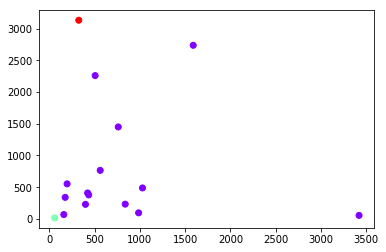

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

v=np.unique(d.country)
size = len(v)
X = []
for pais in v:
  p_values = d.suicides_no[d.country == pais].values
  p_muestra = sample(p1, 84)
  X.append(p_muestra)
X = np.array(X)
print "X:",X.shape
X_T = np.array(np.transpose(X))
print "X_T:",X_T.shape

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X) 

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow') 
print kmeans.labels_.shape

### Suicidios pais 1 vs suicidios pais 2

In [0]:
d.head()

348

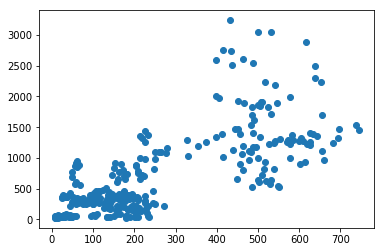

In [0]:
plt.scatter(d.suicides_no[d.country == v[0]],d.suicides_no[d.country == v[1]])